In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv('mall.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Choosing 2 dimension for easy plotting

X=df.iloc[:,[3,4]].values

In [6]:
X


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

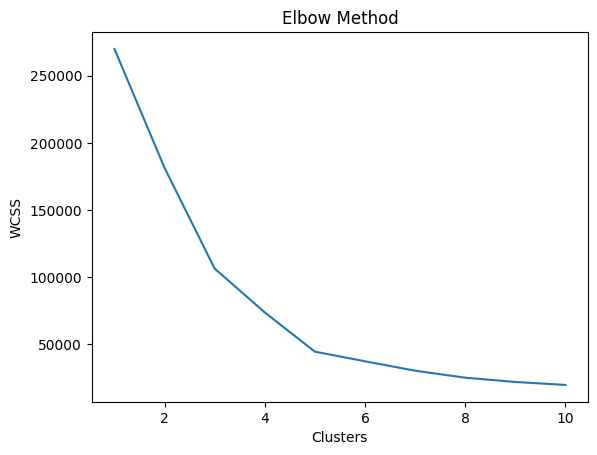

In [11]:
# using Elbow Method
from sklearn.cluster import KMeans
WCSS=[]

# Within Clusters Sum of Squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,11), WCSS)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Here Number of clusters must be 5 

In [22]:
# Apply KMeans Algorithm to the dataset 
kmeans=KMeans(n_clusters=6, random_state=None, init='k-means++')
y_kmeans=kmeans.fit_predict(X)

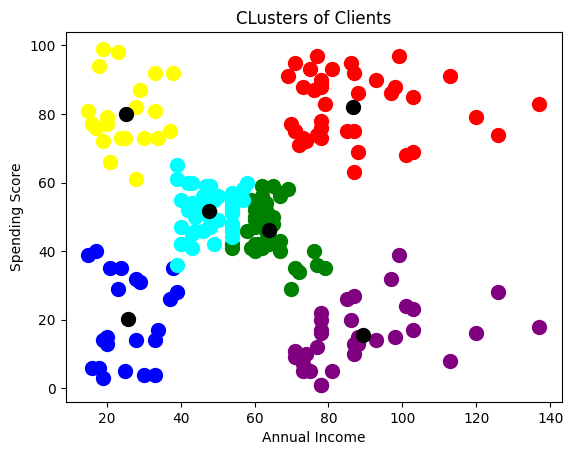

In [23]:
# Visualize the cluster
# c--> Color
# s--> markersize
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='yellow', label='Cluster 4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='cyan', label='Cluster 5')
plt.scatter(X[y_kmeans==5,0], X[y_kmeans==5,1], s=100, c='purple', label='Cluster 6')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')
plt.title('CLusters of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### Vibe Coding 

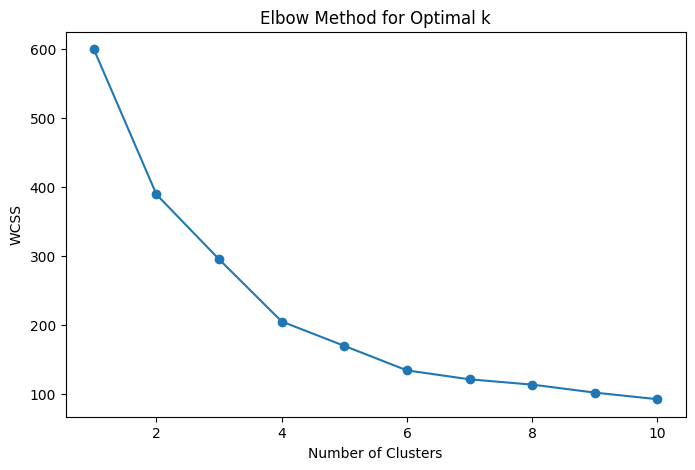

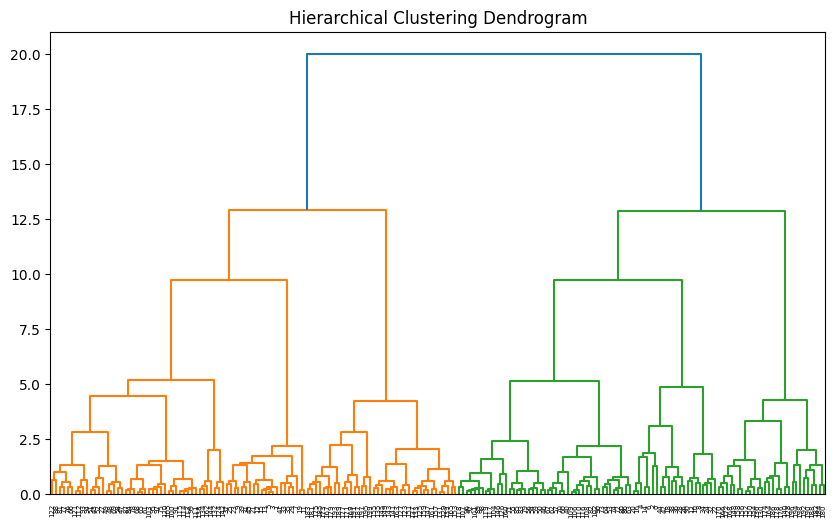

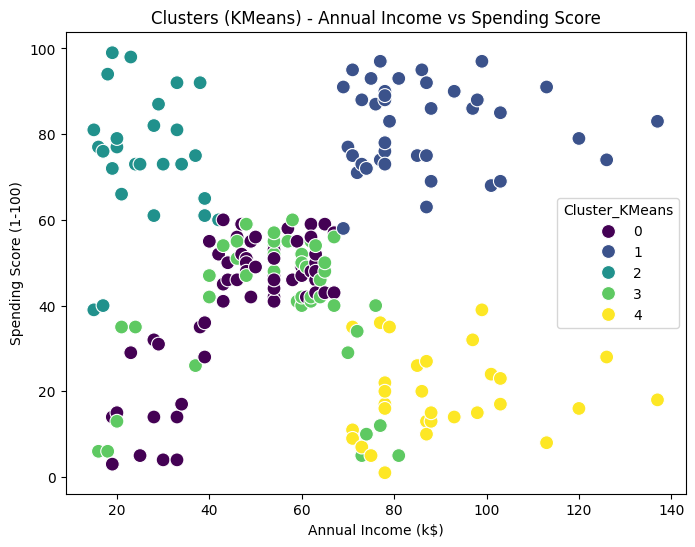

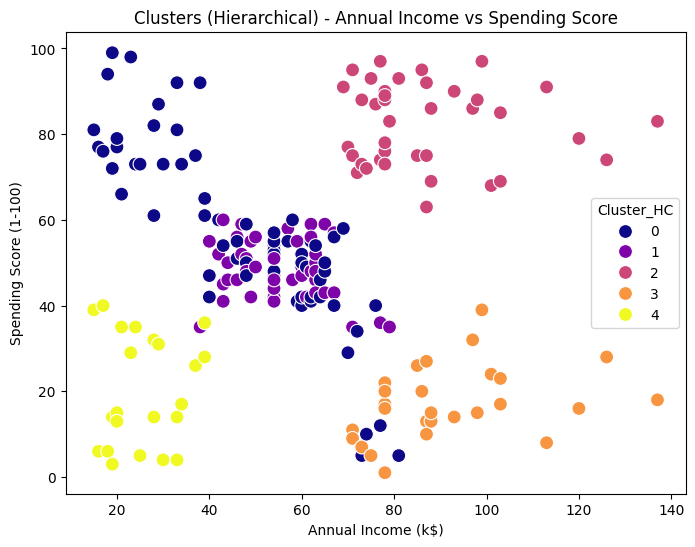

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster_KMeans  Cluster_HC  
0               2           4  
1               2           0  
2               3           4  
3               2           0  
4               2           4  


In [25]:
# Clustering Model on Mall Customers Dataset

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 2: Load dataset
df = pd.read_csv("mall.csv")

# Step 3: Data preprocessing
# Drop non-numeric column 'CustomerID' and 'Gender' (encode Gender if needed)
df_num = df.drop(columns=['CustomerID', 'Gender'], errors='ignore')

# Scale data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# Step 4: Elbow Method for optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Step 5: Apply KMeans with chosen k (say k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Step 6: Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10,6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Cluster_HC'] = hc.fit_predict(X_scaled)


# Step 7: Visualize clusters
# Example 1: Annual Income vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Cluster_KMeans'], palette='viridis', s=100)
plt.title("Clusters (KMeans) - Annual Income vs Spending Score")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Cluster_HC'], palette='plasma', s=100)
plt.title("Clusters (Hierarchical) - Annual Income vs Spending Score")
plt.show()

# Step 8: Final clustered dataset
print(df.head())


In [26]:
wcss

[600.0,
 389.3861889564371,
 295.4562449213556,
 205.22514747675916,
 169.89149793438582,
 134.35277477401493,
 121.3893502250287,
 113.72723000071335,
 102.13623844329254,
 92.55027231838785]